# Import Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jobs_in_data.csv')
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
739,2023,Data Analyst,Data Analysis,USD,61200,61200,United States,Entry-level,Full-time,In-person,United States,M
8177,2022,Data Engineer,Data Engineering,USD,97000,97000,United States,Senior,Full-time,Remote,United States,M
237,2023,Business Intelligence Engineer,BI and Visualization,USD,185000,185000,United States,Mid-level,Full-time,In-person,United States,L
1678,2023,Machine Learning Engineer,Machine Learning and AI,USD,205000,205000,United States,Senior,Full-time,In-person,United States,M
8148,2022,Data Analyst,Data Analysis,USD,100000,100000,United States,Senior,Full-time,In-person,United States,M
4668,2023,Business Intelligence Engineer,BI and Visualization,USD,79600,79600,United States,Senior,Full-time,In-person,United States,L
4646,2023,Data Engineer,Data Engineering,USD,241000,241000,United States,Senior,Full-time,In-person,United States,M
3716,2023,Data Strategist,Data Architecture and Modeling,USD,104000,104000,United States,Senior,Full-time,In-person,United States,M
7886,2022,Data Analytics Manager,Leadership and Management,USD,155000,155000,United States,Mid-level,Full-time,In-person,United States,M
4101,2023,ML Engineer,Machine Learning and AI,USD,315850,315850,United States,Senior,Full-time,In-person,United States,M


# EDA

In this project, I want to analyze the job salary of Data Analysts so I'll only include the rows with "Data Analyst" Job Title

In [36]:
# To make our dataframe only include the supposed data
df = df[df['job_title'] == 'Data Analyst']

In [37]:
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5115,2023,Data Analyst,Data Analysis,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
3623,2023,Data Analyst,Data Analysis,USD,94000,94000,United States,Senior,Full-time,In-person,United States,M
7725,2022,Data Analyst,Data Analysis,USD,115934,115934,United States,Senior,Full-time,Remote,United States,M
1349,2023,Data Analyst,Data Analysis,USD,106300,106300,United States,Mid-level,Full-time,In-person,United States,M
6097,2023,Data Analyst,Data Analysis,USD,105000,105000,United States,Senior,Full-time,Remote,United States,M
8145,2022,Data Analyst,Data Analysis,USD,166700,166700,United States,Senior,Full-time,In-person,United States,M
747,2023,Data Analyst,Data Analysis,USD,110000,110000,United States,Mid-level,Full-time,Remote,United States,M
7245,2023,Data Analyst,Data Analysis,EUR,48000,51824,Spain,Senior,Full-time,In-person,Spain,M
650,2023,Data Analyst,Data Analysis,USD,85000,85000,United States,Senior,Full-time,Remote,United States,M
2356,2023,Data Analyst,Data Analysis,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


Theres 2 Salary column, and it will be a redundant for our data because it seems like the columns are very similar to each others. Let's take the one that are already converted into USD

In [38]:
df = df.drop(columns = 'salary',axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 15 to 9338
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1388 non-null   int64 
 1   job_title           1388 non-null   object
 2   job_category        1388 non-null   object
 3   salary_currency     1388 non-null   object
 4   salary_in_usd       1388 non-null   int64 
 5   employee_residence  1388 non-null   object
 6   experience_level    1388 non-null   object
 7   employment_type     1388 non-null   object
 8   work_setting        1388 non-null   object
 9   company_location    1388 non-null   object
 10  company_size        1388 non-null   object
dtypes: int64(2), object(9)
memory usage: 130.1+ KB


In [40]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

Looks like the dataset is good to go!

In [43]:
df['salary_in_usd'].describe()

count      1388.000000
mean     109911.472622
std       42994.095507
min       15000.000000
25%       80000.000000
50%      105320.000000
75%      135000.000000
max      430967.000000
Name: salary_in_usd, dtype: float64

In [44]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [50]:
df['company_location'].value_counts()

United States               1219
United Kingdom                85
Canada                        29
Spain                         16
Estonia                        6
Australia                      4
Germany                        4
France                         3
Greece                         3
Portugal                       3
Colombia                       2
India                          2
Croatia                        2
Slovenia                       2
Poland                         2
Central African Republic       2
Philippines                    1
Argentina                      1
Singapore                      1
Indonesia                      1
Name: company_location, dtype: int64

Because the data is very imbalanced between United States and Non-United States Countries, lets group the Non-United States Countries into one category

In [51]:
df['country_category'] = df['company_location'].apply(lambda x: 'United States' if x == 'United States' else 'Non-United States')

In [52]:
df['country_category'].value_counts()

United States        1219
Non-United States     169
Name: country_category, dtype: int64

Even though the data is still very much imbalanced, it would be easier to explore. For example, take a look at the data below:

## Nationals Average Data Analyst Salary per Year by Experience Level

In [62]:
avg_salary_non_grouped = df.groupby(['work_year','company_location','experience_level'])['salary_in_usd'].mean()
avg_salary_non_grouped

work_year  company_location          experience_level
2020       France                    Mid-level            46759.000000
           Germany                   Entry-level          47899.000000
           Portugal                  Entry-level          22809.000000
           United States             Entry-level          81500.000000
                                     Mid-level            85000.000000
2021       Australia                 Entry-level          42028.000000
           Canada                    Senior               71786.000000
           France                    Entry-level          59102.000000
           Germany                   Senior               63831.000000
           Philippines               Senior               50000.000000
           United Kingdom            Mid-level            51519.000000
           United States             Entry-level          70000.000000
                                     Mid-level            89166.666667
                       

In [63]:
avg_salary = df.groupby(['work_year','country_category','experience_level'])['salary_in_usd'].mean()
avg_salary

work_year  country_category   experience_level
2020       Non-United States  Entry-level          35354.000000
                              Mid-level            46759.000000
           United States      Entry-level          81500.000000
                              Mid-level            85000.000000
2021       Non-United States  Entry-level          50565.000000
                              Mid-level            51519.000000
                              Senior               61872.333333
           United States      Entry-level          70000.000000
                              Mid-level            89166.666667
                              Senior              131666.666667
2022       Non-United States  Entry-level          42473.600000
                              Mid-level            77161.312500
                              Senior               71521.588235
           United States      Entry-level          60245.000000
                              Executive           120000.

The second pivot / group by are more readable than the first since the non-United States Countries has been grouped.

Now, lets make a visualization based on the data above:

<Figure size 1200x600 with 0 Axes>

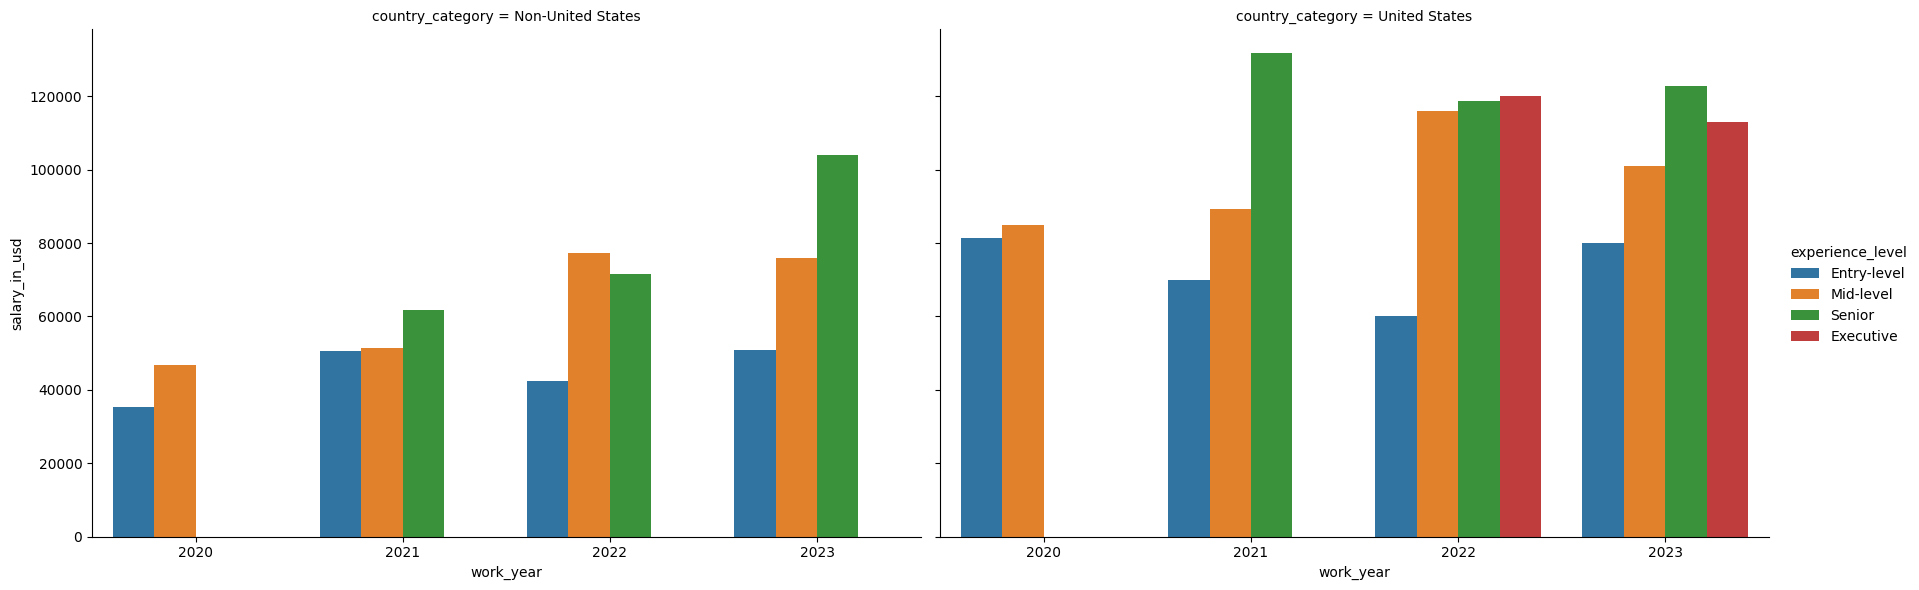

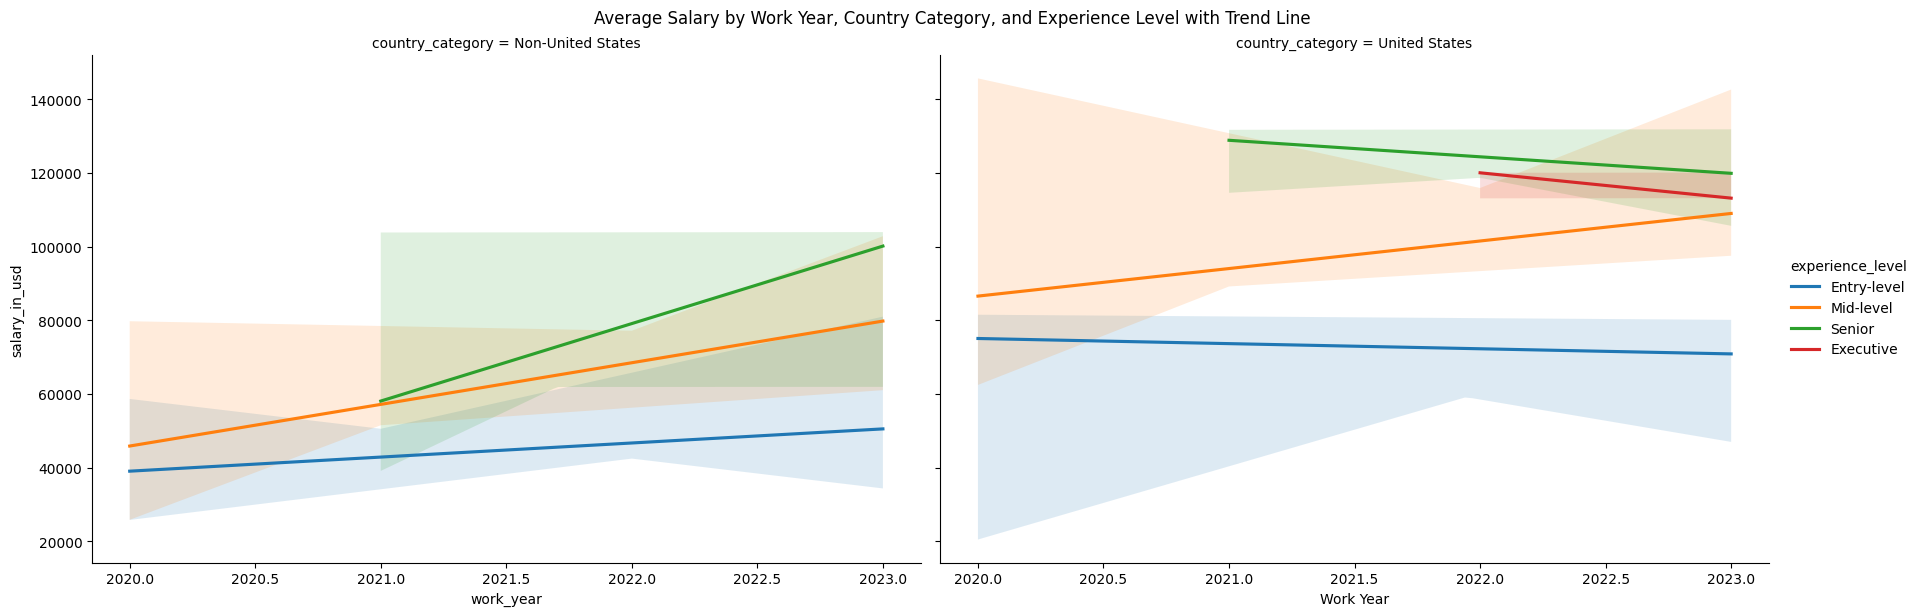

In [84]:
# Creating a combination plot (scatter plot + trend line)
plt.figure(figsize=(12, 6))
sns.catplot(
    x='work_year',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    kind='bar',
    data=avg_salary,
    height=6,
    aspect=1.5
)

# Adding trend lines to each scatter plot
sns.lmplot(
    x='work_year',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    data=avg_salary,
    height=6,
    aspect=1.5,
    scatter=False  # Suppress scatter points in lmplot
)

# Adding labels and title
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.suptitle('Average Salary by Work Year, Country Category, and Experience Level with Trend Line', y=1.02)

# Displaying the plot
plt.show()

From this visualization, we can conclude that :

1. The average salary trend line on the Non-United Stated countries on all experience level are always rising from 2020 - 2023, while most of the United States average data analyst salary are dropping, except for the mid-level analyst
2. There's a similarity between the Non-United States and United States Data on Experience level. It's the fact that both of them started to have Senior-Level Analysts on 2021.
3. There's only Executive Level Analysts on United States Analysts Group

Lets Continue to the next analysis

# Work Setting for Data Analysts

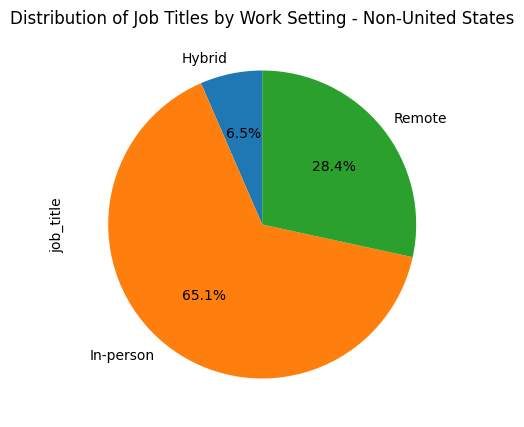

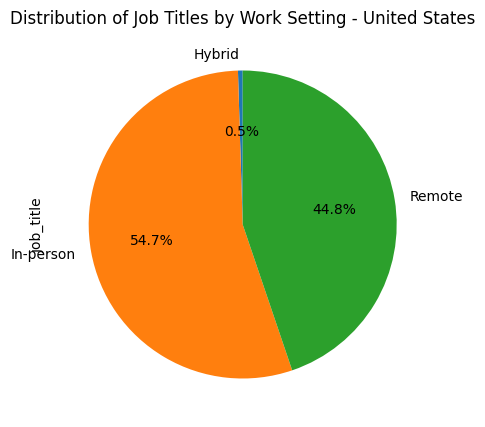

In [98]:
# Getting unique values in 'country_category'
unique_country_categories = work_settings['country_category'].unique()

# Creating separate pie plots for each 'country_category'
for category in unique_country_categories:
    category_data = work_settings[work_settings['country_category'] == category]

    # Creating a pie plot
    category_data.plot.pie(
        y='job_title',
        labels=category_data['work_setting'],
        autopct='%1.1f%%',
        startangle=90,
        figsize=(5, 5),
        title=f'Distribution of Job Titles by Work Setting - {category}',
        legend=False
    )

    # Displaying the plot for each 'country_category'
    plt.show()

From the visualization above, we can conclude that :
1. Both country group have a very low 'hybrid' work settings and a fairly high 'In-Person' work settings job on data analytics, but Non-United States country group is lower than United States
2. United States provides higher rate of 'Remote' Work settings job on Data Analytics.

# Company Size & Experience Level Impact on Average Salary

In [108]:
# Lets group the data based on company size and experience level. Then, we make an average aggregation on their salary in USD
comp_salary = df.groupby(['country_category','company_size','experience_level'])['salary_in_usd'].mean()
comp_salary

country_category   company_size  experience_level
Non-United States  L             Entry-level          36368.714286
                                 Mid-level            60947.000000
                                 Senior              117415.500000
                   M             Entry-level          52547.750000
                                 Mid-level            77166.453125
                                 Senior               95926.767123
                   S             Mid-level            20000.000000
                                 Senior               43456.000000
United States      L             Entry-level          68085.846154
                                 Mid-level            91350.000000
                                 Senior              150787.500000
                   M             Entry-level          79668.194805
                                 Executive           114107.142857
                                 Mid-level           104616.741135
            

<Figure size 1200x600 with 0 Axes>

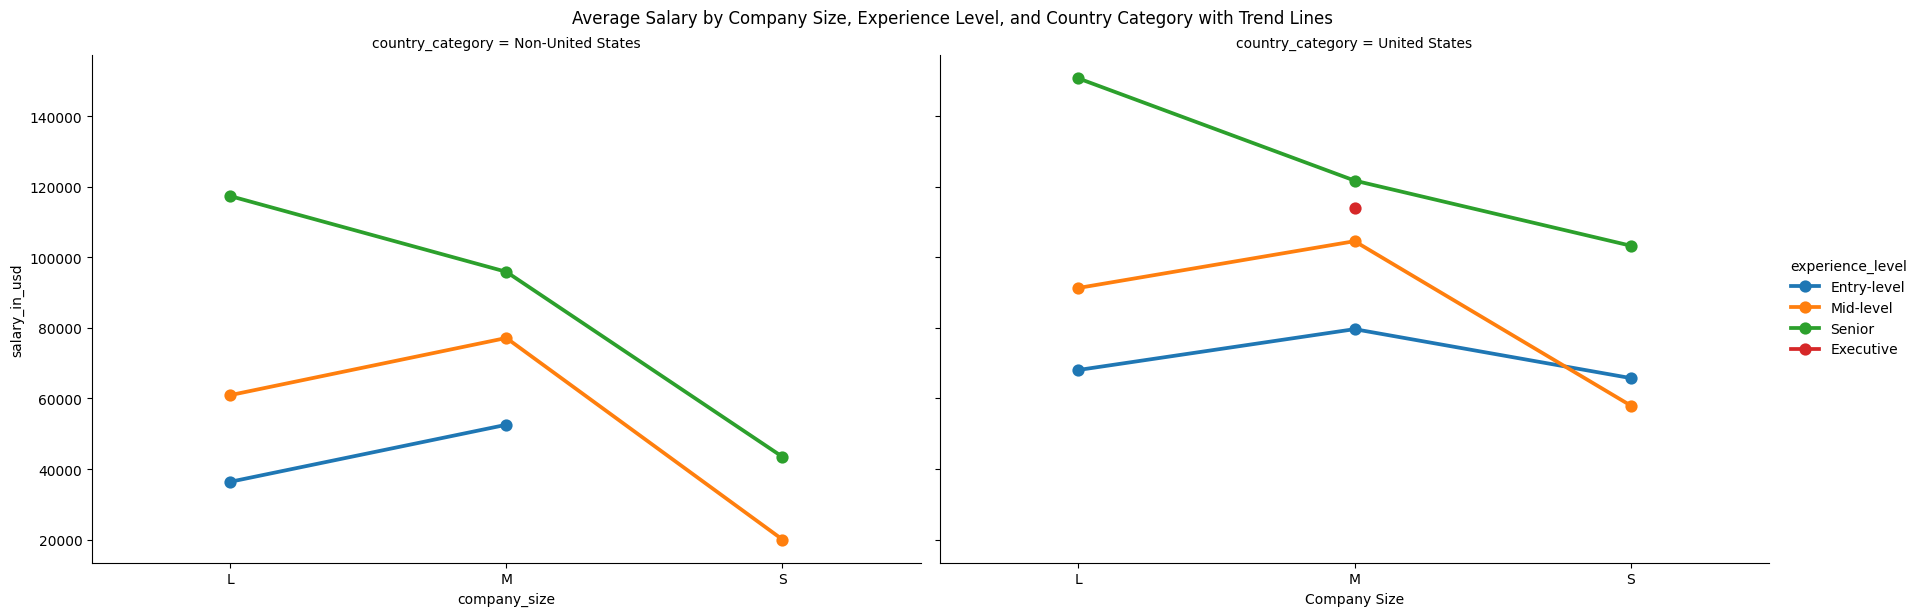

In [111]:
# Resetting the index for better plotting
comp_salary = comp_salary.reset_index()

# Creating a combination plot (scatter plot + trend line)
plt.figure(figsize=(12, 6))
sns.catplot(
    x='company_size',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    kind='point',  # 'point' for scatter plot
    data=comp_salary,
    height=6,
    aspect=1.5
)

# Adding labels and title
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.suptitle('Average Salary by Company Size, Experience Level, and Country Category with Trend Lines', y=1.02)

# Displaying the plot
plt.show()

From this Visualization we can conclude that :
1. The only trend line that's normal is the 'Senior' Experience Level Trendline on average salary, the average salary goes down with how smaller the company is.
2. The other experience level shows a rather unstable average salary rate
3. In the 'Entry-Level' and 'Mid-Level' experience level, the Middle-Sized Companies have a better salary rate than the Large-Sized Companies.